In [1743]:
import pandas as pd
import warnings 
warnings.filterwarnings('ignore') 
url = 'https://raw.githubusercontent.com/rashakil-ds/Public-Datasets/main/automobile.csv'
df = pd.read_csv(url)

In [1744]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [1745]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

# Goal & Steps:

1. Predicting Car Prices:
   - Task: Build a regression model to predict the price (y=price) of cars based on other features in the dataset. This could involve preprocessing the data, selecting relevant features, and implementing `linear regression` and `KNN` algorithm.

2. Feature Engineering:
   - Task: Challenge students to come up with creative ways to engineer new features from the existing ones. For example, they could create a new feature representing the ratio of horsepower to curb weight.

3. Exploratory Data Analysis (EDA):
   - Task: Have students perform in-depth exploratory data analysis to understand the relationships between different features. Visualization tools can be used to communicate their findings effectively.

4. Handling Missing Data:
   - Task: Teach students how to handle missing data in a dataset. They can explore different strategies such as imputation or removal of missing values.

5. Training:
   - Task: Use relavant ML Models

6. Model evaluation:
- Evaluate models and Summarizing their findings. This should include a clear explanation of the model's performance and any insights gained from the analysis.

In [1746]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split as tts

In [1747]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          202 non-null    int64  
 1   normalized-losses  165 non-null    float64
 2   make               202 non-null    object 
 3   fuel-type          202 non-null    object 
 4   aspiration         202 non-null    object 
 5   num-of-doors       200 non-null    object 
 6   body-style         202 non-null    object 
 7   drive-wheels       202 non-null    object 
 8   engine-location    202 non-null    object 
 9   wheel-base         202 non-null    float64
 10  length             202 non-null    float64
 11  width              202 non-null    float64
 12  height             202 non-null    float64
 13  curb-weight        202 non-null    int64  
 14  engine-type        202 non-null    object 
 15  num-of-cylinders   202 non-null    object 
 16  engine-size        202 non

In [1748]:
df['num-of-cylinders'].unique()

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

In [1749]:
ordinal = OrdinalEncoder(categories=[['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve', 'thirteen', 'fourteen', 'fifteen']])
ordinal

OrdinalEncoder(categories=[['one', 'two', 'three', 'four', 'five', 'six',
                            'seven', 'eight', 'nine', 'ten', 'eleven', 'twelve',
                            'thirteen', 'fourteen', 'fifteen']])

In [1750]:
df['num-of-cylinders'] = ordinal.fit_transform(df[['num-of-cylinders']])
df['num-of-cylinders']

0      3.0
1      3.0
2      5.0
3      3.0
4      4.0
      ... 
197    3.0
198    5.0
199    5.0
200    3.0
201    3.0
Name: num-of-cylinders, Length: 202, dtype: float64

In [1751]:
mode_door = df['num-of-doors'].mode()[0]
df['num-of-doors'] = df['num-of-doors'].fillna(mode_door)


In [1752]:
df['num-of-doors'] = ordinal.fit_transform(df[['num-of-doors']])
df['num-of-doors']

0      1.0
1      1.0
2      1.0
3      3.0
4      3.0
      ... 
197    3.0
198    3.0
199    3.0
200    3.0
201    3.0
Name: num-of-doors, Length: 202, dtype: float64

In [1753]:
object_columns = df.select_dtypes(include='object')
object_columns.nunique()


make               22
fuel-type           2
aspiration          2
body-style          5
drive-wheels        3
engine-location     2
engine-type         6
fuel-system         8
bore               39
stroke             37
horsepower         59
peak-rpm           23
dtype: int64

In [1754]:

df.replace('?', np.nan, inplace=True)

In [1755]:
to_float = ['bore', 'stroke', 'horsepower', 'peak-rpm']

for x in to_float:
    df[x] = df[x].astype(float)

In [1756]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          202 non-null    int64  
 1   normalized-losses  165 non-null    float64
 2   make               202 non-null    object 
 3   fuel-type          202 non-null    object 
 4   aspiration         202 non-null    object 
 5   num-of-doors       202 non-null    float64
 6   body-style         202 non-null    object 
 7   drive-wheels       202 non-null    object 
 8   engine-location    202 non-null    object 
 9   wheel-base         202 non-null    float64
 10  length             202 non-null    float64
 11  width              202 non-null    float64
 12  height             202 non-null    float64
 13  curb-weight        202 non-null    int64  
 14  engine-type        202 non-null    object 
 15  num-of-cylinders   202 non-null    float64
 16  engine-size        202 non

In [1757]:
object_columns = df.select_dtypes(include='object')
object_columns.nunique()

make               22
fuel-type           2
aspiration          2
body-style          5
drive-wheels        3
engine-location     2
engine-type         6
fuel-system         8
dtype: int64

In [1758]:
columns_with_nulls = df.columns[df.isna().any()]

for col in columns_with_nulls:
    med = df[col].median()
    df[col] = df[col].fillna(med)

df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115.0,alfa-romero,gas,std,1.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,115.0,alfa-romero,gas,std,1.0,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,115.0,alfa-romero,gas,std,1.0,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,3.0,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,3.0,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


In [1759]:

le = LabelEncoder()

In [1760]:
categorical_columns = df.select_dtypes('object').columns
categorical_columns

Index(['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'fuel-system'],
      dtype='object')

<Axes: >

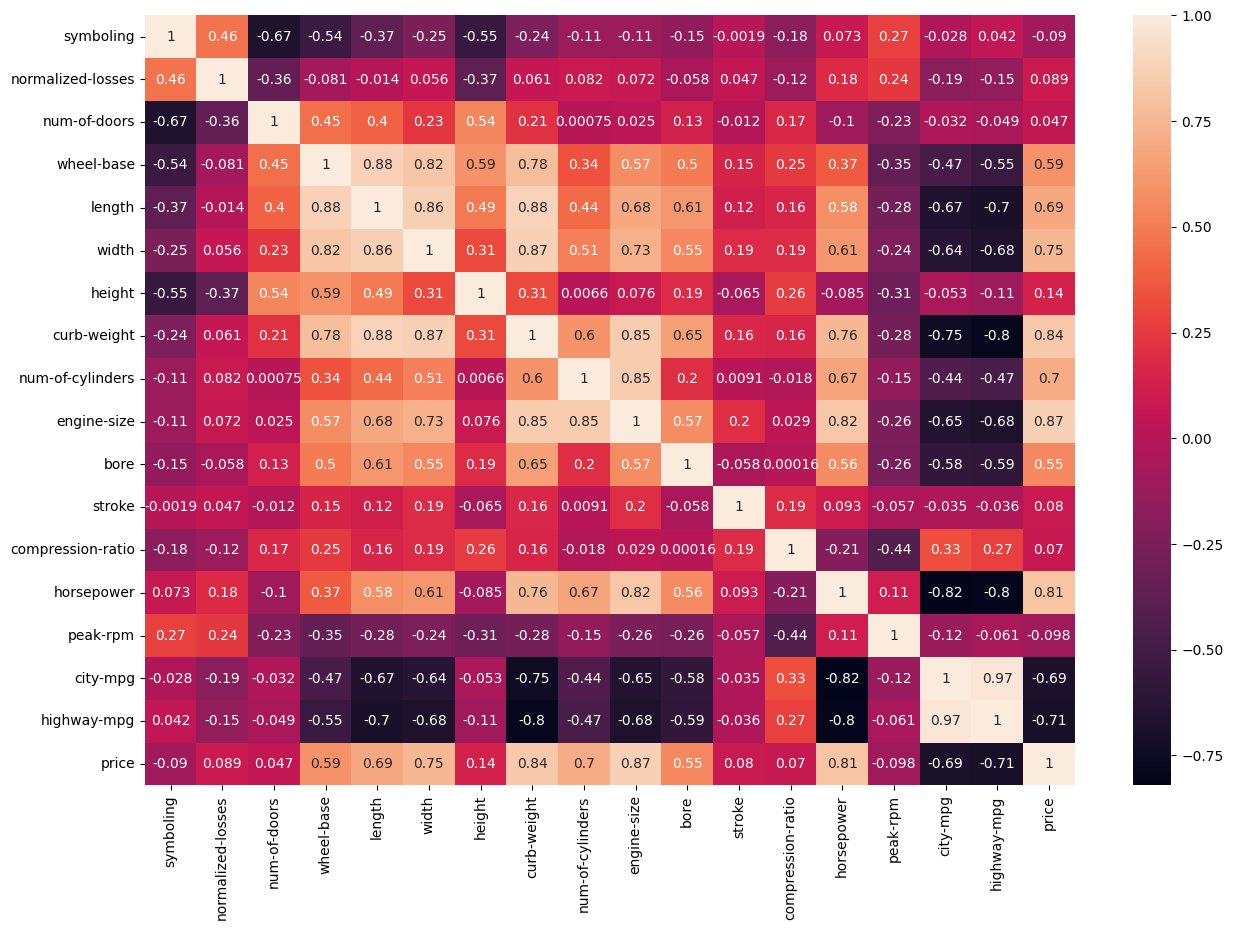

In [1761]:

numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix, annot=True)

In [1762]:
df['horsepower_per_curb_weight'] = df['horsepower'] / df['curb-weight']
df['car_size'] = df['length'] * df['width'] * df['height']
df['stroke_to_bore'] = df['stroke'] / df['bore']
df['fuel_efficiency'] = (df['city-mpg'] + df['highway-mpg']) / 2



<Axes: >

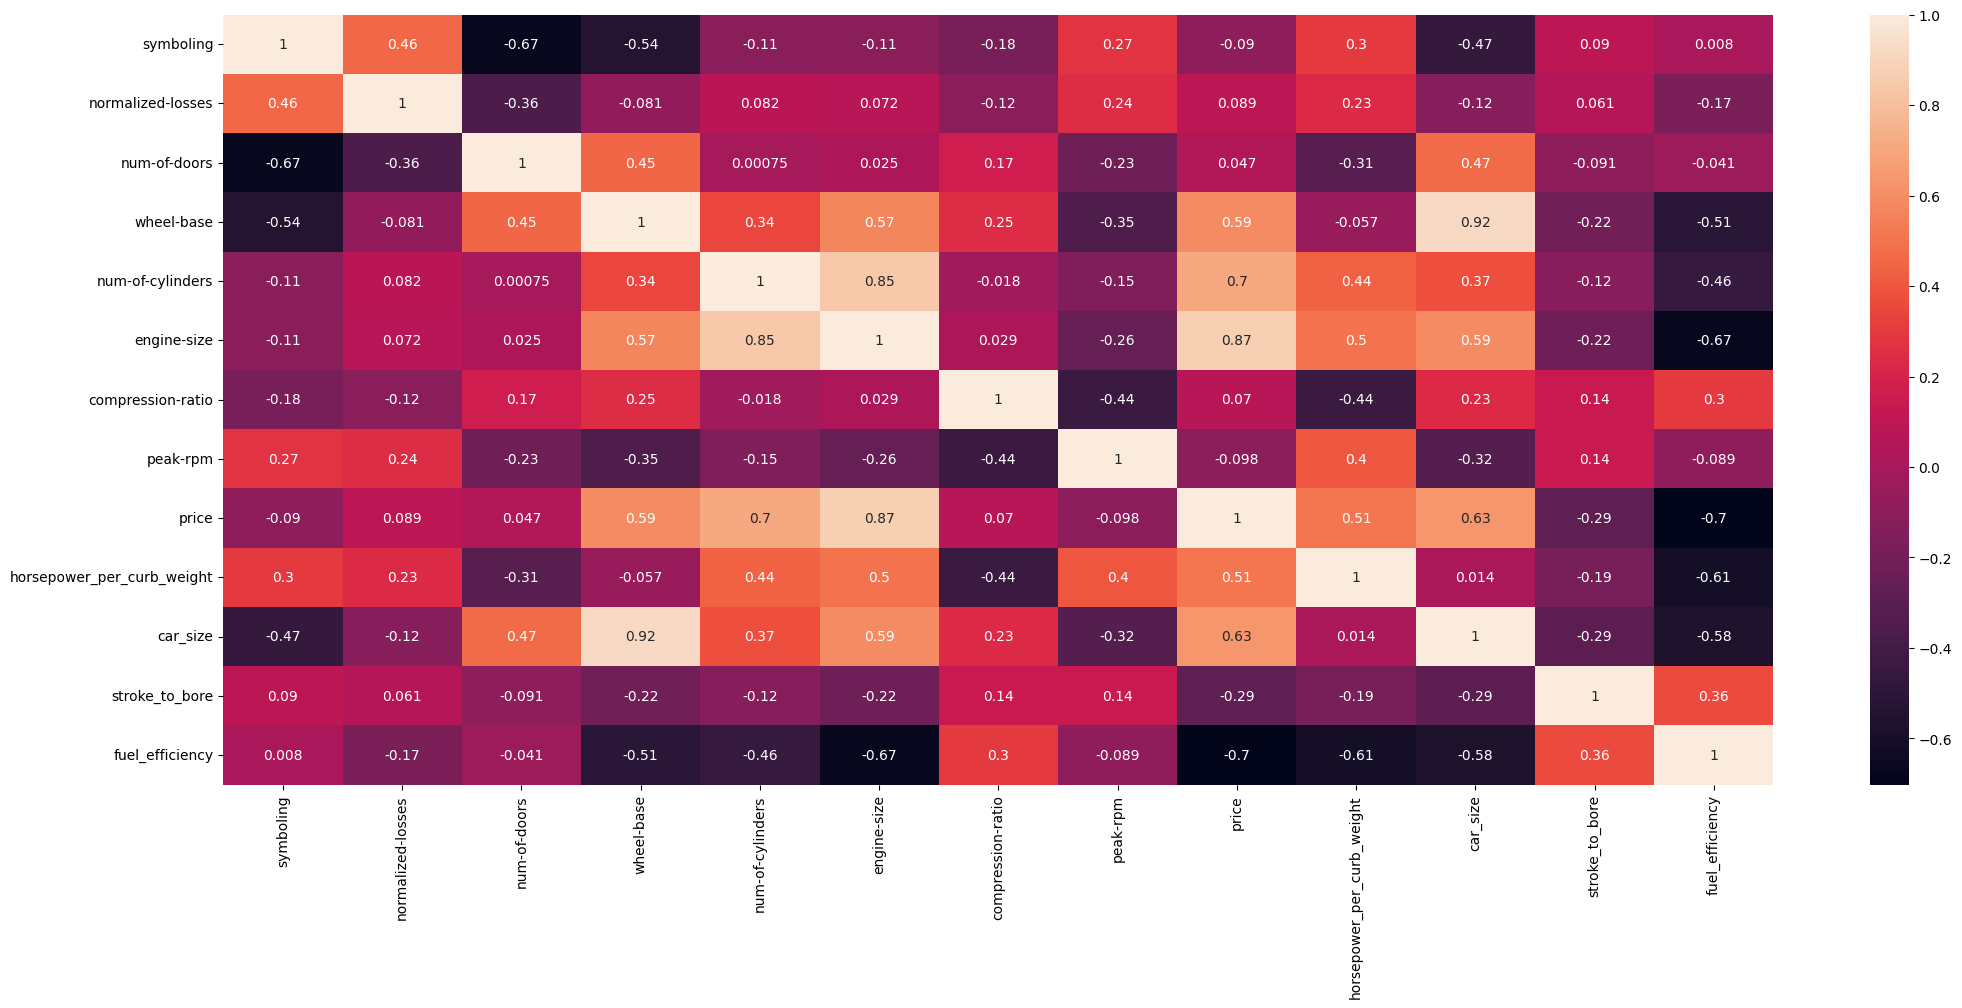

In [1763]:

df = df.drop(['bore','horsepower','curb-weight','length','width','height','stroke','city-mpg','highway-mpg'], axis =  1)
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(25,10))
sns.heatmap(correlation_matrix, annot=True)

In [1764]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   symboling                   202 non-null    int64  
 1   normalized-losses           202 non-null    float64
 2   make                        202 non-null    object 
 3   fuel-type                   202 non-null    object 
 4   aspiration                  202 non-null    object 
 5   num-of-doors                202 non-null    float64
 6   body-style                  202 non-null    object 
 7   drive-wheels                202 non-null    object 
 8   engine-location             202 non-null    object 
 9   wheel-base                  202 non-null    float64
 10  engine-type                 202 non-null    object 
 11  num-of-cylinders            202 non-null    float64
 12  engine-size                 202 non-null    int64  
 13  fuel-system                 202 non

In [1765]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,compression-ratio,peak-rpm,price,horsepower_per_curb_weight,car_size,stroke_to_bore,fuel_efficiency
0,3,115.0,alfa-romero,gas,std,1.0,convertible,rwd,front,88.6,...,3.0,130,mpfi,9.0,5000.0,13495,0.043564,528019.904,0.772334,24.0
1,3,115.0,alfa-romero,gas,std,1.0,convertible,rwd,front,88.6,...,3.0,130,mpfi,9.0,5000.0,16500,0.043564,528019.904,0.772334,24.0
2,1,115.0,alfa-romero,gas,std,1.0,hatchback,rwd,front,94.5,...,5.0,152,mpfi,9.0,5000.0,16500,0.054552,587592.640,1.294776,22.5
3,2,164.0,audi,gas,std,3.0,sedan,fwd,front,99.8,...,3.0,109,mpfi,10.0,5500.0,13950,0.043646,634816.956,1.065831,27.0
4,2,164.0,audi,gas,std,3.0,sedan,4wd,front,99.4,...,4.0,136,mpfi,8.0,5500.0,17450,0.040722,636734.832,1.065831,20.0


In [1766]:
categorical_columns = df.select_dtypes('object').columns
categorical_columns

Index(['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels',
       'engine-location', 'engine-type', 'fuel-system'],
      dtype='object')

In [1767]:
for c in categorical_columns:
       df[c] = le.fit_transform(df[[c]])
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,compression-ratio,peak-rpm,price,horsepower_per_curb_weight,car_size,stroke_to_bore,fuel_efficiency
0,3,115.0,0,1,0,1.0,0,2,0,88.6,...,3.0,130,5,9.0,5000.0,13495,0.043564,528019.904,0.772334,24.0
1,3,115.0,0,1,0,1.0,0,2,0,88.6,...,3.0,130,5,9.0,5000.0,16500,0.043564,528019.904,0.772334,24.0
2,1,115.0,0,1,0,1.0,2,2,0,94.5,...,5.0,152,5,9.0,5000.0,16500,0.054552,587592.640,1.294776,22.5
3,2,164.0,1,1,0,3.0,3,1,0,99.8,...,3.0,109,5,10.0,5500.0,13950,0.043646,634816.956,1.065831,27.0
4,2,164.0,1,1,0,3.0,3,0,0,99.4,...,4.0,136,5,8.0,5500.0,17450,0.040722,636734.832,1.065831,20.0


In [1768]:

Y = df['price']
X = df.drop('price', axis = 1)
scaler = StandardScaler()
sdf = scaler.fit_transform(X)

In [1769]:
xtrain, xtest, ytrain, ytest = tts(X, Y, train_size=.75)

In [1770]:
reg = LinearRegression()
reg.fit(xtrain,ytrain)

LinearRegression()

In [1771]:
reg.score(xtrain,ytrain)

0.875425061391271

In [1772]:
reg.score(xtest, ytest)

0.8902482867195685

In [1773]:
knn_reg = KNeighborsRegressor(n_neighbors=3)
knn_reg.fit(xtrain, ytrain)

KNeighborsRegressor(n_neighbors=3)

In [1774]:
knn_reg.score(xtrain,ytrain)

0.782444557976262

In [1775]:
knn_reg.score(xtest, ytest)

0.6280625962012536